# Minimal working example scripts (made to be tested in Yale's cluster)

Here you can find a set of scripts oriented to test the MWE with different pipelines (e.g `LMM.ipynb`, `Hudson_plot.ipynb`, etc).

If you have a local copy of the MWE please make sure to change the paths before running the script. 

Also, it is very important to select the appopiate kernel, in this case you would need to select bash on the drop-down menu to the right of the script

*Note:* to test the LD-clumping and Hudson_plot pipelines you would need to have run the LMM.ipynb beforehand and obtain the summary statistics file (pre-requisite for the mentioned pipelines). 

These scripts are designed to run in Yale's cluster. If you need to run them in your local computer make sure you add the correct paths and remove both --container_lmm and --container_marp options

For more information on each pipeline please take a look at each notebook

If you find that instructions are confusing, please take note on how to improve and send them Diana Cornejo. Thanks for your suggestions.

Update: 02-11-2020 Added scripts for PLINK binary files (FIXME: manhattan plot complaining about non-existent ylim object)

In [30]:
# Global
MWE_PATH=/gpfs/gibbs/pi/dewan/data/UKBiobank/MWE
UKBB_PATH=/gpfs/gibbs/pi/dewan/data/UKBiobank
container_lmm=/gpfs/gibbs/pi/dewan/data/UKBiobank/lmm.sif
container_marp=/gpfs/gibbs/pi/dewan/data/UKBiobank/marp.sif 
bfile=$MWE_PATH/genotypes.bed
formatFile_fastGWA=$MWE_PATH/fastGWA_template.yml
formatFile_regenie=$MWE_PATH/regenie_template.yml
formatFile_boltlmm=$MWE_PATH/boltLMM_template.yml

# Inputed data
cwd=$MWE_PATH/output
sampleFile=$MWE_PATH/imputed_genotypes.sample
genoFile=$MWE_PATH/imputed_genotypes_chr*.bgen
phenoFile=$MWE_PATH/phenotypes.txt
sumstatsFiles=$MWE_PATH/output/phenotypes_BMI.fastGWA.snp_stats.gz
region_file=$MWE_PATH/regions.txt
bgen_sample_path=$MWE_PATH/imputed_genotypes.sample


# Exome data
#cwd=$MWE_PATH/output
#sampleFile=$MWE_PATH/burden/ukb23155_c21_b0_v1.plink.exome.filtered.fam
#genoFile=$MWE_PATH/burden/ukb23155_c2*_b0_v1.plink.exome.filtered.bed
#phenoFile=$MWE_PATH/burden/phenotype_burden.txt
#sumstatsFiles=$MWE_PATH/output/burden/phenotype_burden_BMI.fastGWA.snp_stats.gz
#sumstatsFiles=$MWE_PATH/output/burden/phenotype_burden_ASTHMA.regenie.snp_stats.gz
unrelated_samples=$MWE_PATH/burden/unrelated_ind_burden.txt
region_file=$MWE_PATH/regions_plink.txt
geno_path=$MWE_PATH/burden/genotype_inventory_bed.txt
bgen_sample_path=$MWE_PATH/

## Create MWE for regenie_burden and region_extraction

In [ ]:
sos run ~/project/UKBB_GWAS_dev/workflow/MWE.ipynb plink_mwe\
    --cwd $MWE_PATH/burden \
    --bfile $UKBB_PATH/genotype_files/pleiotropy_geneticfiles/UKB_Caucasians_phenotypeindepqc120319_updated020720removedwithdrawnindivs.bed \
    --genoFile `echo $UKBB_PATH/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_c{21..22}_b0_v1.bed` \
    --sampleFile $MWE_PATH/imputed_genotypes.sample \
    --phenoFile $MWE_PATH/burden/phenotype_burden.txt \
    --samplesPlink $MWE_PATH/burden/phenotype_burden_IID.txt \
    --unrelated_samples $MWE_PATH/burden/unrelated_ind_burden.txt \
    --rsid `echo ~/scratch60/plink-clumping/chr{21..22}_filter_snps.txt`

In [ ]:
sos dryrun ~/project/UKBB_GWAS_dev/workflow/MWE.ipynb plink_mwe \
    --cwd ~/scratch60/plink-clumping/MWE \
    --bfile /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/pleiotropy_geneticfiles/UKB_Caucasians_phenotypeindepqc120319_updated082020removedwithdrawnindiv.bed \
    --genoFile `echo /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_c{21..22}_b0_v1.bed` \
    --sampleFile /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb39554_imputeddataset/ukb32285_imputedindiv.sample \
    --samplesPlink /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/burden/phenotype_burden_IID.txt \
    --phenoFile /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/burden/phenotype_burden.txt \
    --unrelated_samples /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/pleiotropy_geneticfiles/unrelated_n307259/UKB_unrelatedcauc_phenotypes_asthmat2dbmiwaisthip_agesex_waisthipratio_040620 \
    -s build 

## 1. MWE for BOLT-LMM

In [ ]:
sos run ~/project/bioworkflows/GWAS/LMM.ipynb boltlmm \
    --cwd $cwd \
    --bfile $bfile\
    --sampleFile $sampleFile \
    --genoFile $genoFile \
    --phenoFile $phenoFile\
    --formatFile $formatFile_boltlmm \
    --LDscoresFile $UKBB_PATH/LDSCORE.1000G_EUR.tab.gz \
    --geneticMapFile $UKBB_PATH/genetic_map_hg19_withX.txt.gz \
    --phenoCol BMI \
    --covarCol SEX \
    --covarMaxLevels 10 \
    --qCovarCol AGE \
    --numThreads 5 \
    --bgenMinMAF 0.001 \
    --bgenMinINFO 0.1 \
    --lmm-option \
    --p_filter 1 \
    --container_lmm $container_lmm \
    --container_marp $container_marp

## 2. MWE for FastGWA

In [31]:
sos run ~/project/bioworkflows/GWAS/LMM.ipynb fastGWA \
    --cwd $cwd \
    --bfile $bfile \
    --sampleFile $sampleFile \
    --genoFile $genoFile \
    --phenoFile $phenoFile \
    --formatFile $formatFile_fastGWA \
    --phenoCol BMI \
    --covarCol SEX \
    --qCovarCol AGE \
    --numThreads 1 \
    --bgenMinMAF 0.1 \
    --bgenMinINFO 0.1 \
    --parts 2 \
    --p_filter 1 \
    --container_lmm $container_lmm \
    --container_marp $container_marp

INFO: Running fastGWA_1: fastGWA mixed model (based on the sparse GRM generated above)
INFO: fastGWA_1 (index=0) is completed.
INFO: fastGWA_1 (index=1) is completed.
INFO: fastGWA_1 output:   /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/cache/imputed_genotypes_chr21.phenotypes.fastGWA.gz /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/cache/imputed_genotypes_chr22.phenotypes.fastGWA.gz in 2 groups
INFO: Running fastGWA_2: Merge results and log files
INFO: fastGWA_2 is completed.
INFO: fastGWA_2 output:   /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/phenotypes_BMI.fastGWA.snp_stats.gz /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/phenotypes_BMI.fastGWA.snp_counts.txt
INFO: Running fastGWA_3: Manhattan and QQ plots using `qqman`
INFO: fastGWA_3 is completed.
INFO: fastGWA_3 output:   /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/phenotypes_BMI.fastGWA.manhattan.png /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/phenotypes_BMI.fastGWA.qq.png... (5 items)
INFO: Running fastGWA_4: Gen

## 3. MWE for REGENIE

In [ ]:
sos run ~/project/bioworkflows/GWAS/LMM.ipynb regenie \
    --cwd $MWE_PATH/output/\
    --bfile $MWE_PATH/genotypes21_22.bed \
    --sampleFile $sampleFile \
    --genoFile $genoFile \
    --phenoFile $phenoFile\
    --formatFile $formatFile_regenie\
    --phenoCol ASTHMA \
    --covarCol SEX \
    --qCovarCol AGE \
    --numThreads 8 \
    --bsize 1000 \
    --lowmem_prefix $cwd\
    --trait bt \
    --minMAC 4 \
    --bgenMinMAF 0.05 \
    --bgenMinINFO 0.8 \
    --maf_filter  0.5 \
    --geno_filter  0.1 \
    --mind_filter  0.1 \
    --reverse_log_p \
    --p_filter 1\
    --container_lmm $container_lmm\
    --container_marp $container_marp

### Regenie burden

In [ ]:
anno_file = path
set_list = path
keep_gene = path
aaf_file = path
mask_file = path
aaf_bins = 0.001

sos run ~/project/bioworkflows/GWAS/LMM.ipynb regenie_burden \
    --cwd $cwd \
    --bfile $bfile\
    --sampleFile $sampleFile \
    --genoFile $genoFile\
    --phenoFile $phenoFile \
    --formatFile $formatFile_regenie\
    --phenoCol ASTHMA \
    --covarCol SEX \
    --qCovarCol AGE \
    --numThreads 8 \
    --bsize 1000 \
    --lowmem_prefix $cwd \
    --trait bt \
    --anno_file \
    --set_list $set_list \
    --keep_gene $keep_gene \
    --aaf_file $aaf_file \
    --mask_file $mask_file \
    --aaf_bins 0.1 \
    --container_lmm $container_lmm


## 4. MWE LD Clumping

In [ ]:
#%save MWE_ldclump.sh -f

# Defining bash variables for the different paths,

ld_sample_size=100
clump_field=P
clump_p1=0.001
clump_p2=1
clump_r2=0.2
clump_kb=1000
clump_annotate=OR
numThreads=20
job_size=1

#Running the workflow for BMI trait

sos run ~/project/bioworkflows/GWAS/LD_Clumping.ipynb \
    --cwd $cwd \
    --bfile $bfile \
    --genoFile $genoFile \
    --sampleFile $sampleFile \
    --sumstatsFiles $sumstatsFiles \
    --unrelated_samples $unrelated_samples \
    --ld_sample_size $ld_sample_size \
    --clump_field $clump_field \
    --clump_p1 $clump_p1 \
    --clump_p2 $clump_p2 \
    --clump_r2 $clump_r2 \
    --clump_kb $clump_kb \
    --clump_annotate $clump_annotate \
    --numThreads $numThreads \
    --job_size $job_size \
    --container_lmm $container_lmm

## 5. MWE for Hudson plot

In [ ]:
sos run ~/bioworkflows/GWAS/Hudson_plot.ipynb hudson  \
    --cwd $cwd \
    --sumstats_1 $cwd/phenotypes_WAIST.fastGWA.snp_stats.gz \
    --sumstats_2 $cwd/phenotypes_BMI.fastGWA.snp_stats.gz \
    --toptitle Waist \
    --bottomtitle BMI \
    --highlight_p_top 0.1 \
    --highlight_p_bottom 0.1 \
    --pval_filter 1 \
    --container_lmm  $container_lmm

## Example of the Hudson_plot.ipynb in real UK Biobank data

In [ ]:
sos run ~/bioworkflows/GWAS/Hudson_plot.ipynb hudson \
    --cwd $cwd \
    --sumstats_1 $UKBB_PATH/results/FastGWA_results/results_imputed_data/tinnitus_082720/200811_UKBB_Tinnitus_plan1_2_3_f4803_tinnitus.fastGWA.snp_stats.gz \
    --sumstats_2 $UKBB_PATH/results/FastGWA_results/results_imputed_data/tinnitus_p2_082720/200811_UKBB_Tinnitus_plan1_2_3_f4803_tinnitus_p2.fastGWA.snp_stats.gz \
    --toptitle Tinnitus plan1 \
    --bottomtitle Tinnitus plan2 \
    --highlight_p_top 5e-08 \
    --highlight_p_bottom 5e-08 \
    --pval_filter 5e-08 \
    --container_lmm $container_lmm

In [ ]:
%preview -s png ~/output/200811_UKBB_Tinnitus_plan1_2_3_f4803_tinnitus.fastGWA_200811_UKBB_Tinnitus_plan1_2_3_f4803_tinnitus_p2.fastGWA.hudson.png

## 6. MWE annotation

### Merge bim files

In [ ]:
bedfiles=`echo /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_c{1..22}_b0_v1.bed`
bimfiles=`echo /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_c{1..22}_b0_v1.bim`
bim_name=~/scratch60/output/ukb23155_chr1_chr22.bim
humandb=/gpfs/ysm/datasets/db/annovar/humandb
name_prefix=rare_variants
maf_filter=0.0
max_maf_filter=0.001
geno_filter=0.0
hwe_filter=0.0
mind_filter=0.0

sos run ~/project/UKBB_GWAS_dev/workflow/QC_Exome_UKBB.ipynb bim_merge \
    --cwd ~/output \
    --bedfiles $bedfiles\
    --bimfiles $bimfiles \
    --bim_name $bim_name \
    --name_prefix $name_prefix\
    --maf_filter  $maf_filter \
    --max_maf_filter $max_maf_filter\
    --geno_filter $geno_filter \
    --mind_filter  $mind_filter \
    --humandb $humandb\
    --container_lmm $container_lmm

### Filter variants to annotate

In [ ]:
bedfiles=`echo /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_c22_b0_v1.bed`
bimfiles=`echo /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_c{1..22}_b0_v1.bim`
bim_name=/home/dc2325/scratch60/output/ukb23155_chr1_chr3.bim
name_prefix=rare_variants
maf_filter=0.0
max_maf_filter=0.001
geno_filter=0.0
hwe_filter=0.0
mind_filter=0.0
sos run ~/project/UKBB_GWAS_dev/workflow/QC_Exome_UKBB.ipynb get_snps \
    --cwd /home/dc2325/scratch60/output/ \
    --bedfiles $bedfiles\
    --bimfiles $bimfiles \
    --bim_name $bim_name \
    --name_prefix $name_prefix\
    --maf_filter  $maf_filter \
    --max_maf_filter $max_maf_filter\
    --geno_filter $geno_filter \
    --mind_filter  $mind_filter \
    --container_lmm /gpfs/gibbs/pi/dewan/data/UKBiobank/lmm.sif

### Convert to vcf if needed

In [ ]:
bedfiles=`echo /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_c22_b0_v1.bed`
bimfiles=`echo /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_c{1..22}_b0_v1.bim`
bim_name=/home/dc2325/scratch60/output/ukb23155_chr1_chr3.bim
name_prefix=rare_variants
maf_filter=0.0
max_maf_filter=0.001
geno_filter=0.0
hwe_filter=0.0
mind_filter=0.0
sos run ~/project/UKBB_GWAS_dev/workflow/QC_Exome_UKBB.ipynb convert_to_vcf \
    --cwd /home/dc2325/scratch60/output/ \
    --bedfiles $bedfiles\
    --bimfiles $bimfiles \
    --bim_name $bim_name \
    --name_prefix $name_prefix\
    --maf_filter  $maf_filter \
    --max_maf_filter $max_maf_filter\
    --geno_filter $geno_filter \
    --mind_filter  $mind_filter \
    --container_lmm /gpfs/gibbs/pi/dewan/data/UKBiobank/lmm.sif

### Annotate functional variation

In [ ]:
bedfiles=`echo /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_c{1..3}_b0_v1.bed`
bimfiles=`echo /gpfs/gibbs/pi/dewan/data/UKBiobank/genotype_files/ukb28374_exomedata/exome_data_OCT2020/ukb23155_c{1..3}_b0_v1.bim`
bim_name=~/output/ukb23155_chr1_chr3.bim
humandb=/gpfs/ysm/datasets/db/annovar/humandb
name_prefix=rare_variants
maf_filter=0.0
max_maf_filter=0.001
geno_filter=0.0
hwe_filter=0.0
mind_filter=0.0

sos run ~/project/UKBB_GWAS_dev/workflow/QC_Exome_UKBB.ipynb annovar \
    --cwd /home/dc2325/scratch60/output/ \
    --bedfiles $bedfiles\
    --bimfiles $bimfiles \
    --bim_name $bim_name \
    --name_prefix $name_prefix\
    --maf_filter  $maf_filter \
    --max_maf_filter $max_maf_filter\
    --geno_filter $geno_filter \
    --mind_filter  $mind_filter \
    --humandb $humandb\
    --container_lmm /gpfs/gibbs/pi/dewan/data/UKBiobank/lmm.sif\
    --container_annovar /home/dc2325/scratch60/annovar.sif

## 7. Region extraction

In [50]:
sos run ~/project/bioworkflows/GWAS/LMM.ipynb fastGWA \
    --cwd $MWE_PATH/output \
    --bfile $MWE_PATH/genotypes.bed \
    --genoFile $MWE_PATH/genotypes21_22.bed \
    --phenoFile $MWE_PATH/phenotypes.txt \
    --formatFile $MWE_PATH/fastGWA_template.yml \
    --phenoCol BMI \
    --covarCol SEX \
    --qCovarCol AGE \
    --numThreads 1 \
    --bgenMinMAF 0.001 \
    --bgenMinINFO 0.1 \
    --parts 2 \
    --p-filter 1\
    --container_lmm /gpfs/gibbs/pi/dewan/data/UKBiobank/lmm.sif

INFO: Running fastGWA_1: fastGWA mixed model (based on the sparse GRM generated above)
INFO: fastGWA_1 (index=0) is ignored due to saved signature
INFO: fastGWA_1 output:   /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/cache/genotypes21_22.phenotypes.fastGWA.gz
INFO: Running fastGWA_2: Merge results and log files
INFO: fastGWA_2 (index=0) is ignored due to saved signature
INFO: fastGWA_2 output:   /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/phenotypes_BMI.fastGWA.snp_stats.gz /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/phenotypes_BMI.fastGWA.snp_counts.txt
INFO: Running fastGWA_3: Manhattan and QQ plots using `qqman`
INFO: fastGWA_3 (index=0) is ignored due to saved signature
INFO: fastGWA_3 output:   /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/phenotypes_BMI.fastGWA.manhattan.png /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/output/phenotypes_BMI.fastGWA.qq.png... (5 items)
INFO: Running fastGWA_4: Generate analysis report: HTML file, and optionally PPTX file
HINT: Pulling docker 

In [36]:
sos run ~/project/bioworkflows/GWAS/Region_Extraction.ipynb \
    --cwd $MWE_PATH/candidate_loci \
    --region-file $MWE_PATH/regions_plink.txt \
    --pheno-path $MWE_PATH/phenotypes.txt  \
    --geno-path $MWE_PATH/genotype_inventory_plink.txt\
    --bgen-sample-path $MWE_PATH/imputed_genotypes.sample \
    --sumstats-path $MWE_PATH/output/phenotypes_BMI.fastGWA.snp_stats.gz \
    --unrelated-samples $MWE_PATH/unrelated_samples.txt  \
    --job-size 1

INFO: Running export utils script: 
INFO: default_1 (index=0) is ignored due to saved signature
INFO: export utils script output:   /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/candidate_loci/utils.py
INFO: Running extract genotypes: 
INFO: default_2 (index=0) is completed.
INFO: default_2 (index=1) is completed.
INFO: extract genotypes output:   /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/candidate_loci/22_49821415_51193629/phenotypes_BMI.fastGWA.snp_stats_22_49821415_51193629.sumstats.gz /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/candidate_loci/22_49821415_51193629/phenotypes_BMI.fastGWA.snp_stats_22_49821415_51193629.genotype.gz... (8 items in 2 groups)
INFO: Running compute LD: 
INFO: default_3 (index=0) is completed.
INFO: default_3 (index=1) is completed.
INFO: compute LD output:   /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/candidate_loci/22_49821415_51193629/phenotypes_BMI.fastGWA.snp_stats_22_49821415_51193629.population_ld.gz /gpfs/gibbs/pi/dewan/data/UKBiobank/MWE/candidate_loci/22_49821415

## 8. PCA analysis

In [54]:
MWE_PATH=/gpfs/gibbs/pi/dewan/data/UKBiobank/MWE
sos run ~/project/bioworkflows/GWAS/PCA.ipynb flashpca\
    --cwd ~/output \
    --bfile $MWE_PATH/burden/genotypes_21_22_plink.exome.bed \
    --genoFile $MWE_PATH/burden/ukb23155_c2?_b0_v1.plink.exome.filtered.bed \
    --phenoFile $MWE_PATH/burden/phenotype_burden_pca.txt \
    --keep_samples $MWE_PATH/burden/unrelated_ind_burden.txt \
    --k 10 \
    --window 50 \
    --shift 10 \
    --r2 0.5 \
    --maf_filter 0.5 \
    --geno_filter 0.2 \
    --mind_filter 0.1 \
    --hwe_filter 0.0\
    --trait_name ethnicity \
    --numThreads 1 \
    --job_size 1 \
    --prob 0.1 \
    --kinship 0.05 \
    --container_lmm /gpfs/gibbs/pi/dewan/data/UKBiobank/lmm.sif

INFO: Running flashpca_1: Run PCA analysis using flashpca
INFO: flashpca_1 (index=0) is ignored due to saved signature
INFO: flashpca_1 output:   /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pca /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pc.png... (3 items)
INFO: Running flashpca_2: Calculate Mahalanobis distance
INFO: flashpca_2 (index=0) is ignored due to saved signature
INFO: flashpca_2 output:   /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pca.mahalanobis /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pca.no_outliers... (5 items)
INFO: Running flashpca_3: Filter out outliers from bed file and filter related individuals to project them onto PCA
INFO: flashpca_3 (index=0) is ignored due to saved signature
INFO: flashpca_3 output:   /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.no_outliers.bed /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.related_id.bed
INFO: Running flashpca_4: R

> /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pc.png (75.5 KiB):

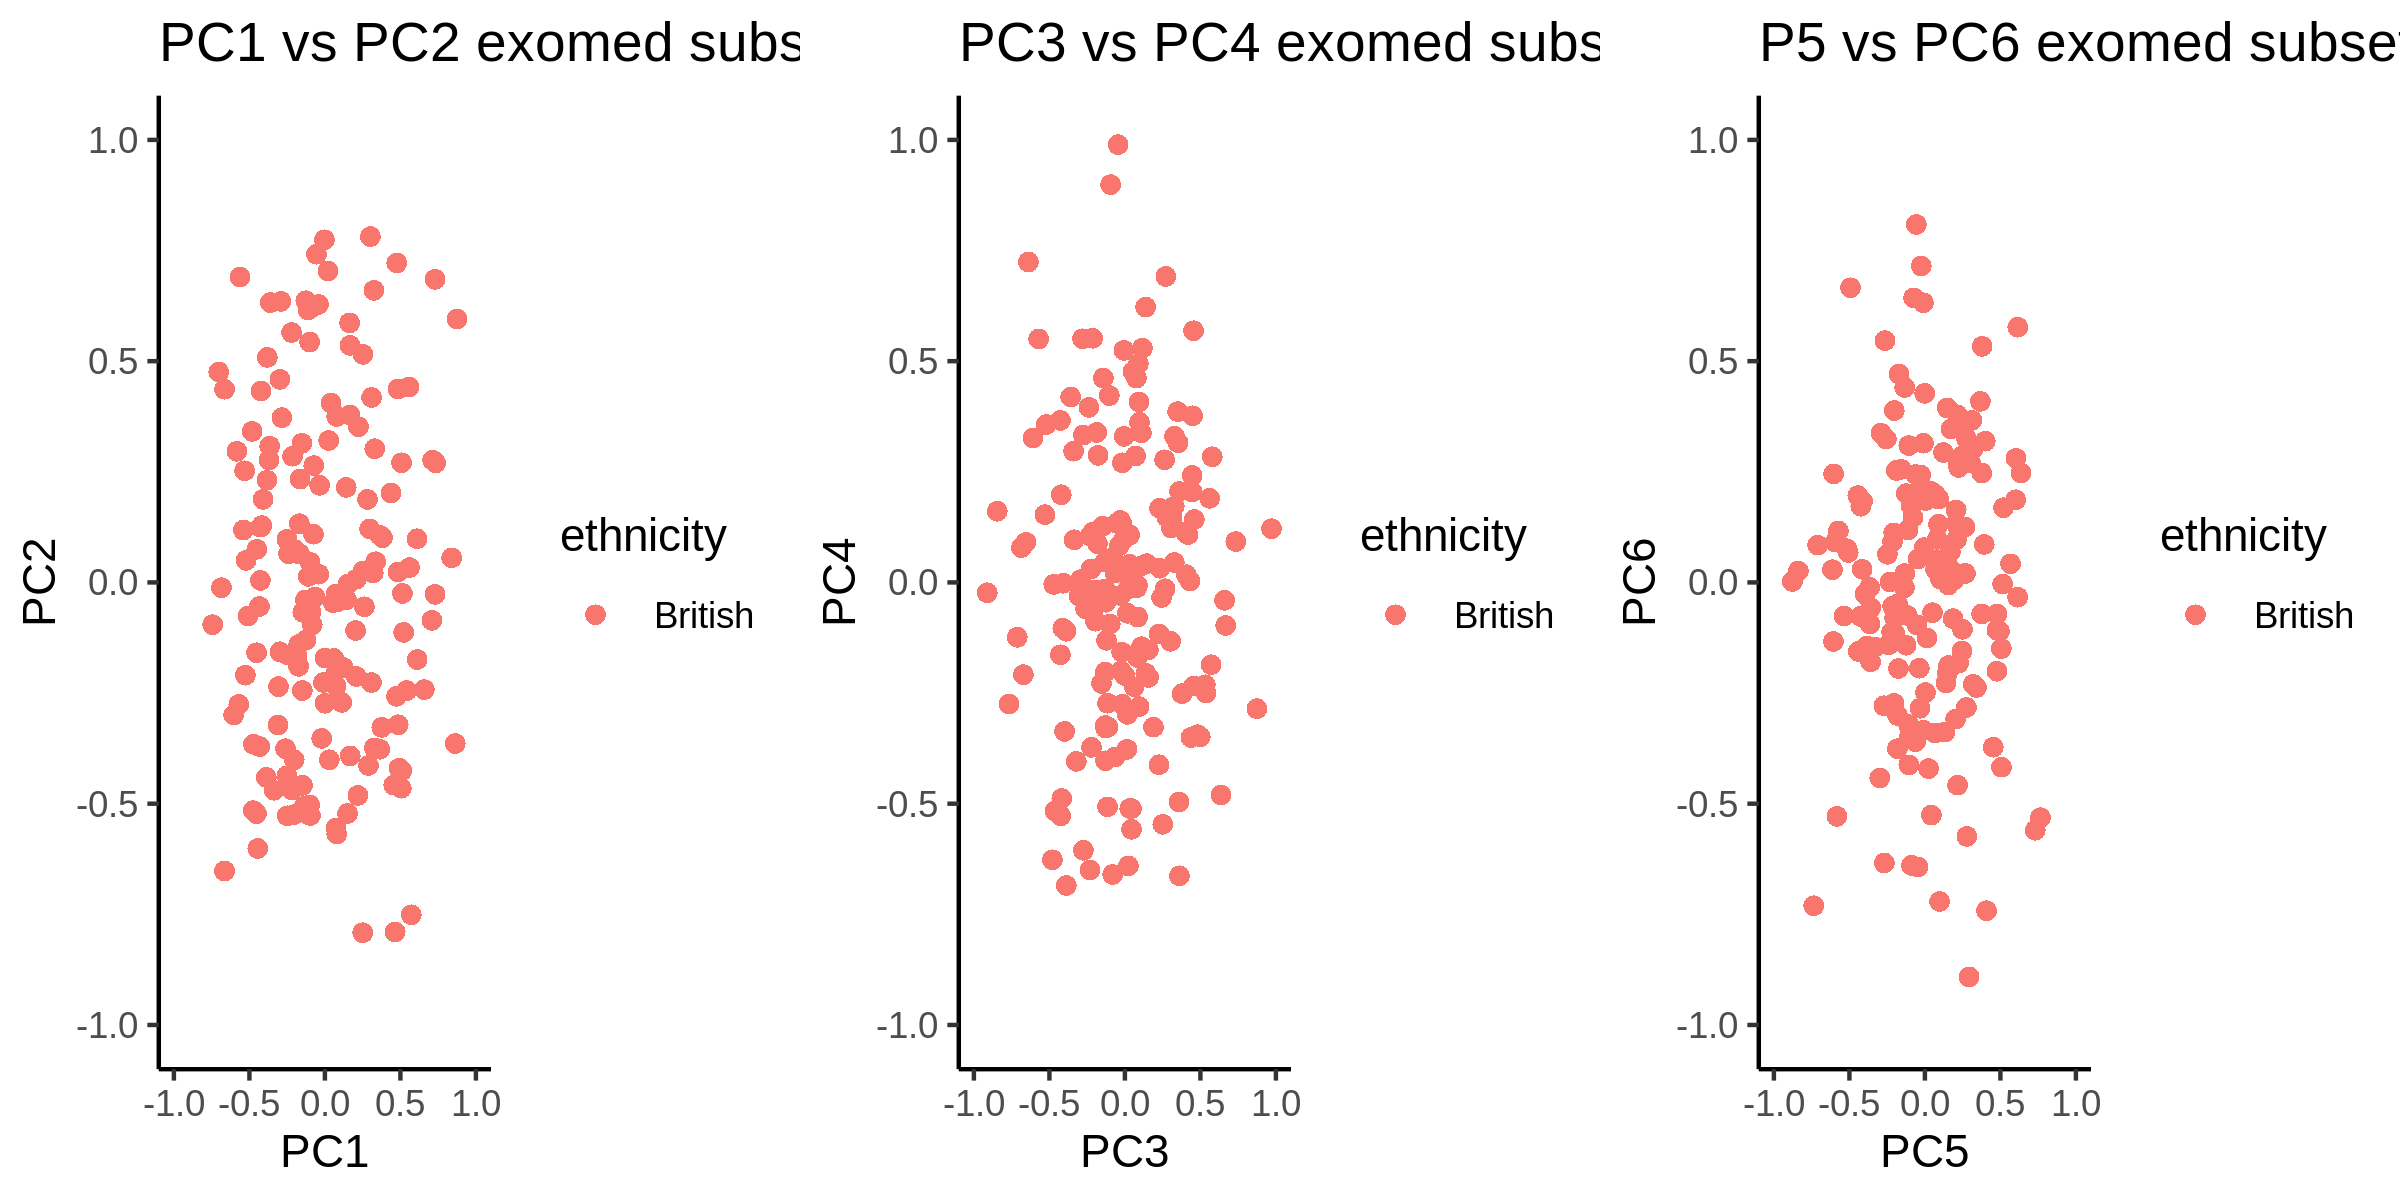

>>> /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pc.png:

bash: /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pc.png: Permission denied


In [5]:
%preview -s png /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pc.png

> /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.scree_cumPVE.png (51.1 KiB):

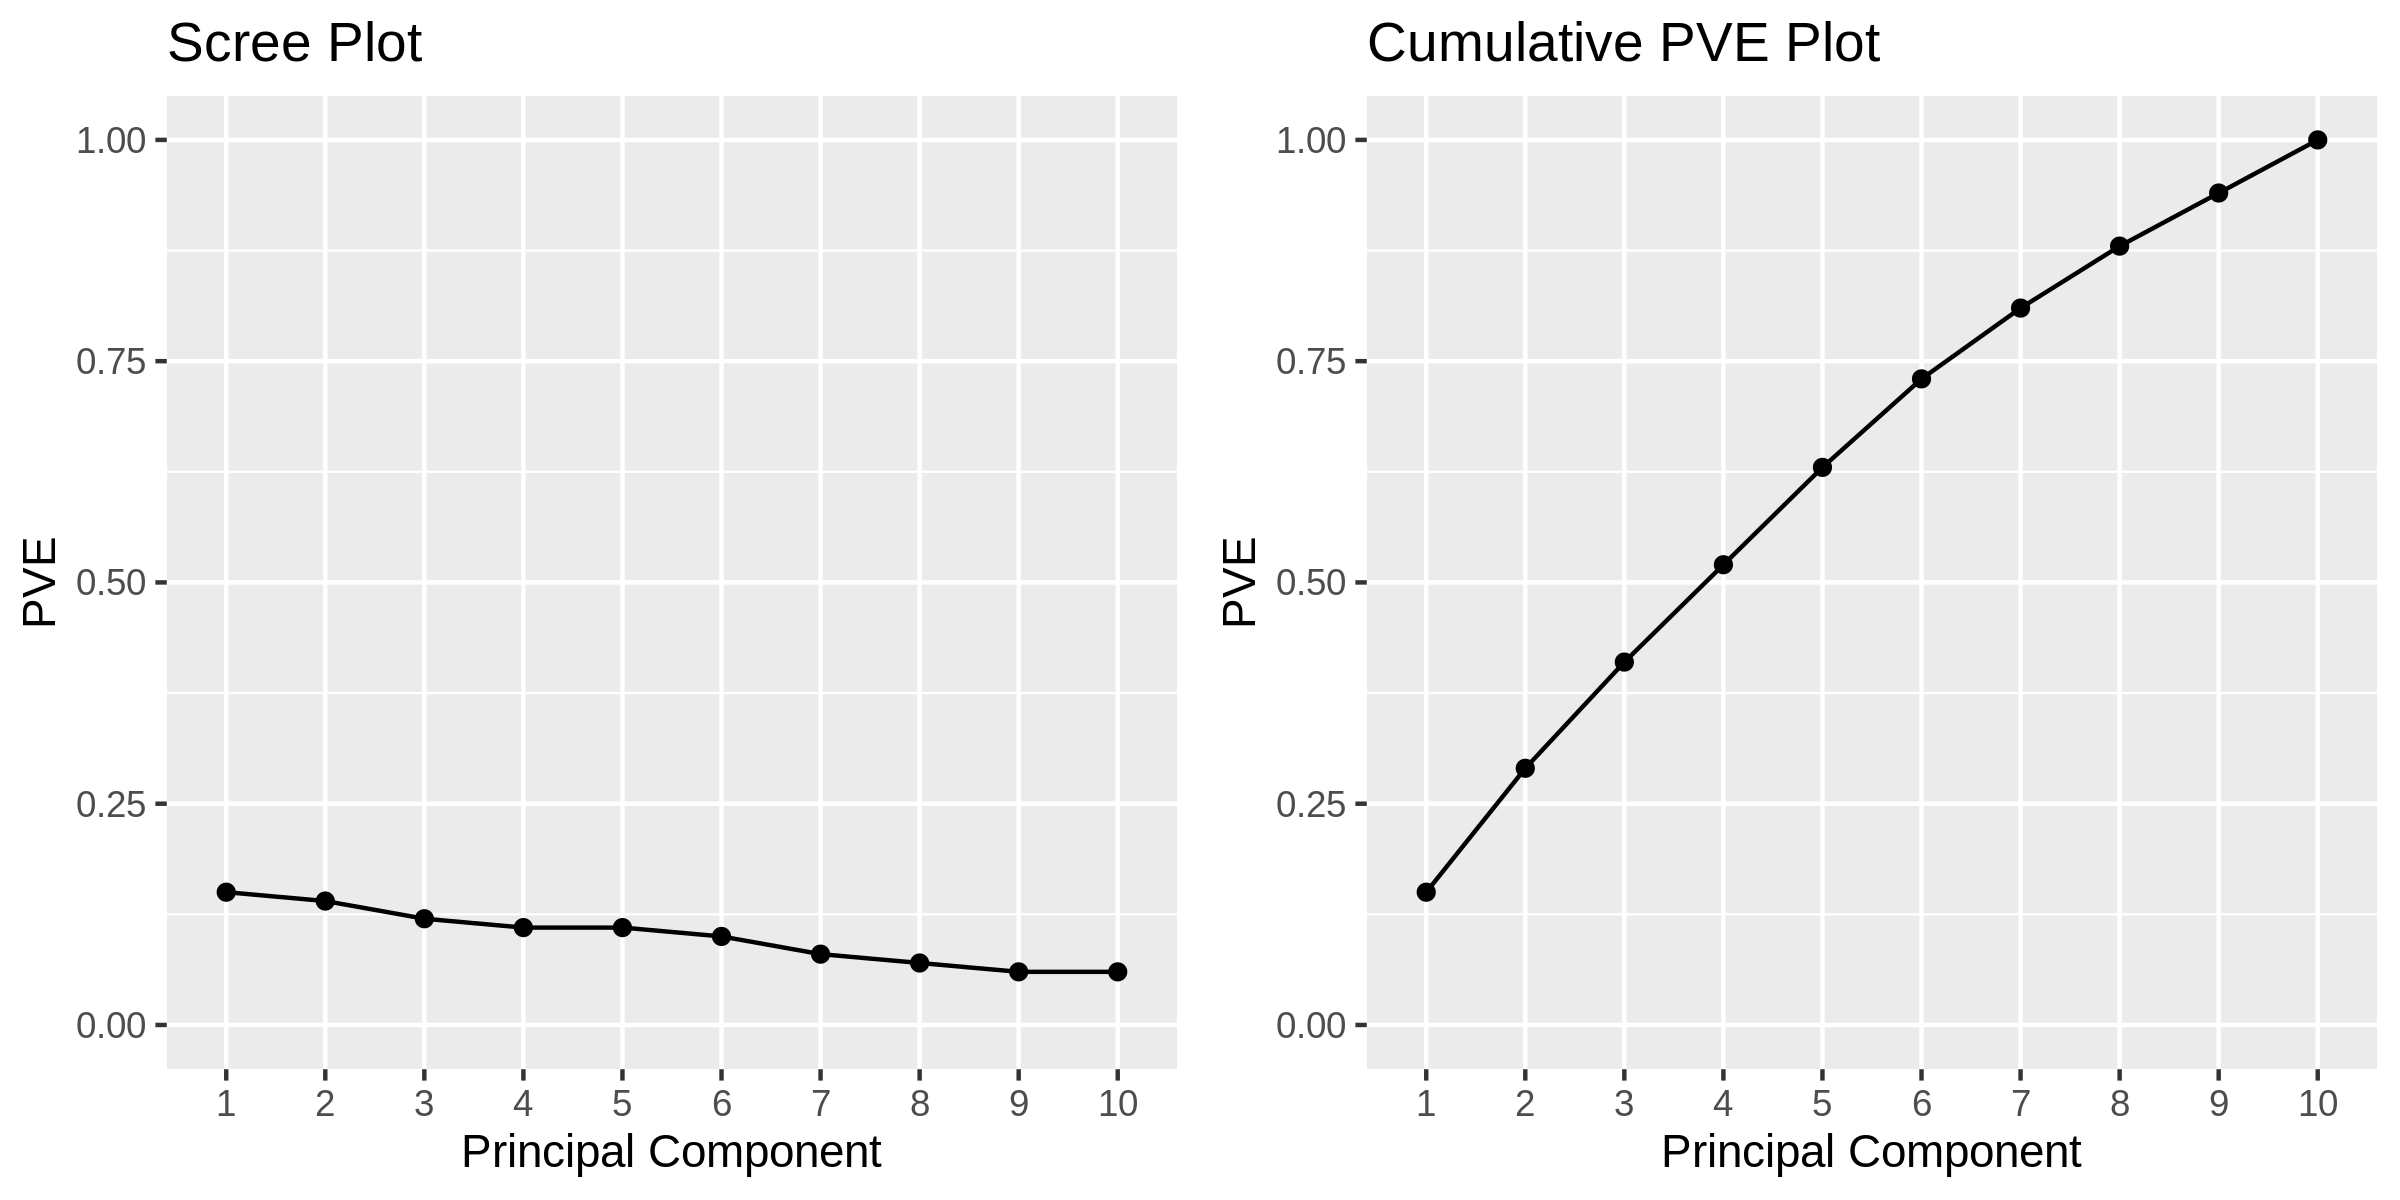

>>> /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.scree_cumPVE.png:

bash: /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.scree_cumPVE.png: Permission denied


In [7]:
%preview -s png /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.scree_cumPVE.png

> /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pca.maha_hist.png (20.0 KiB):

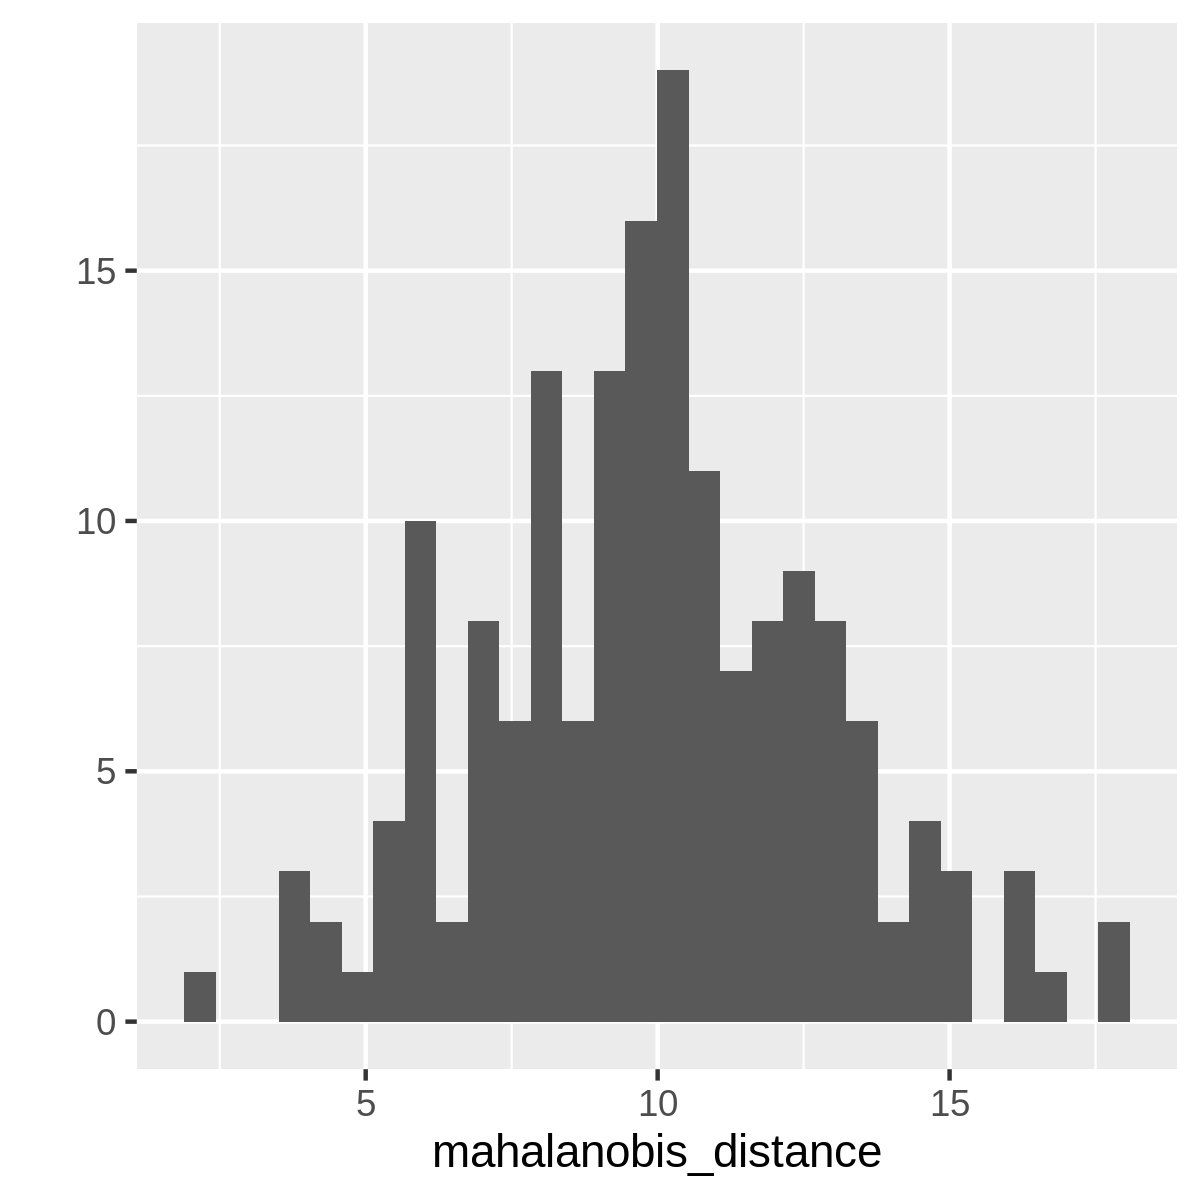

>>> /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pca.maha_hist.png:

bash: /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pca.maha_hist.png: Permission denied



In [10]:
%preview -s png /home/dc2325/output/phenotype_burden_pca.filtered.merged.prune.pca.maha_hist.png